# Họ và tên: Bùi Hoàng Linh
# MSV: 2022602573


In [ ]:
# Cài đặt các thư viện cần thiết
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Loại bỏ các cảnh báo
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay,  confusion_matrix

In [ ]:
# Khai báo các giá trị tham số
DATA_FILE = 'Book1.csv'
K_FOLD       = 4      # Dùng trong đánh giá kiểm định chéo
CV           = 5       # Dùng trong tìm kiếm tham số tốt nhất
DPI          = 200  # độ phân giải cho biểu đồ

In [ ]:
# Hàm đọc file
def readFile(dataFile):
  try:
    df = pd.read_csv(dataFile)
    return df
  except FileNotFoundError:
    print(f"Tệp {dataFile} không tồn tại.")
    return None

In [ ]:
# In dữ liệu của file
df = readFile(DATA_FILE)
if df is not None:
  print("Dữ liệu ban đầu:")
  print(df.to_string())

Dữ liệu ban đầu:
      X    Y    Z    T    U     V    F Class
0   5.8  1.5  1.6  8.1  1.1   6.1  4.2     x
1   1.3  4.6  3.1  2.2  2.9   9.1  5.8     o
2   1.3  4.4  2.8  3.0  2.5  10.0  3.2     x
3   1.6  3.8  2.9  2.2  2.7  11.0  7.0     o
4   5.8  1.3  3.5  3.9  1.3   5.2  3.3     x
5   6.8  3.6  2.3  4.7  2.3   5.8  2.7     x
6   4.5  1.6  1.5  4.1  1.2   9.6  2.0     x
7   2.8  3.8  2.5  3.9  3.9   9.7  2.7     x
8   1.9  2.6  2.9  2.6  2.1   1.7  2.6     o
9   6.8  4.2  2.9  3.9  1.8   2.4  3.9     x
10  2.2  2.9  4.1  2.3  5.2   5.4  3.9     o
11  7.7  1.4  2.5  3.1  1.5   7.3  4.3     x


In [ ]:
# Tiền xử lý dữ liệu

# Chuyển hóa thuộc tính ký tự sang số
scaler = LabelEncoder()
df['Class'] = scaler.fit_transform(df['Class'])

# Lấy dữ liệu chuẩn hóa từ dataframe
X = df.iloc[ : , :-1]
Y = df.iloc[ : , -1]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Khởi tạo hàm kiểm định chéo
kf = KFold(n_splits=4, shuffle=False)
df_y = np.array(Y)
i = 1
X_train_np = []
X_test_np = []
Y_train_np = []
Y_test_np = []
for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      Y_train, Y_test = Y[train_index], Y[test_index]
      X_train_np.append(X_train)
      X_test_np.append(X_test)
      Y_train_np.append(Y_train)
      Y_test_np.append(Y_test)

In [ ]:
# Xây dựng mô hình xác suất Bayes
from sklearn.naive_bayes import GaussianNB

# Sử dụng mô hình Gauss
accuracies_gauss = []
precisions_gauss = []
recalls_gauss    = []
f1_scores_gauss  = []
train_times_gauss = []
results = []

for i in range(K_FOLD):
    X_train, X_test = X_train_np[i], X_test_np[i]
    Y_train, Y_test = Y_train_np[i], Y_test_np[i]
    # Chia dữ liệu thành training và testing


    # Khởi tạo mô hình
    model_gauss = GaussianNB()

    start = time.time()
    # Huấn luyện mô hình
    model_gauss.fit(X_train, Y_train)
    finish = time.time() - start
    print('Thời gian huấn luyện :', finish)

    # Dự đoán mô hình
    y_pred_gauss = model_gauss.predict(X_test)

    # Đưa ra độ chính xác của mô hình
    accuracy_gauss  = accuracy_score(Y_test, y_pred_gauss)
    precision_gauss = precision_score(Y_test, y_pred_gauss)
    recall_gauss    = recall_score(Y_test, y_pred_gauss)
    f1score_gauss   = f1_score(Y_test, y_pred_gauss)


    # In ra kết quả
    print("FOLD:", i+1)
    print("{:15}: {:<5.4}".format('accuracy', accuracy_gauss))
    print("{:15}: {:<5.4}".format('precision', precision_gauss))
    print("{:15}: {:<5.4}".format('recall', recall_gauss))
    print("{:15}: {:<5.4}".format('f1score', f1score_gauss))
    print("{:15}: {:<5.4}s".format('time', finish))

    print("######################################")
    # Lưu kết quả vào danh sách
    results.append({
        'Fold': i + 1,
        'Accuracy': accuracy_gauss,
        'Precision': precision_gauss,
        'Recall': recall_gauss,
        'F1 Score': f1score_gauss,
        'Training Time': finish
    })

    # Append vào các mảng
    accuracies_gauss.append(accuracy_gauss)
    precisions_gauss.append(precision_gauss)
    recalls_gauss.append(recall_gauss)
    f1_scores_gauss.append(f1score_gauss)
    train_times_gauss.append(finish)
    i = i+1


# Tính các giá trị trung bình
mean_accuracy_gauss = np.mean(accuracies_gauss)
std_acc_gauss      = np.std(accuracies_gauss)

mean_precision_gauss = np.mean(precisions_gauss)
std_pre_gauss       = np.std(precisions_gauss)

mean_recall_gauss = np.mean(recalls_gauss)
std_rec_gauss       = np.std(recalls_gauss)

mean_f1score_gauss = np.mean(f1_scores_gauss)
std_f1_gauss       = np.std(f1_scores_gauss)

mean_time_gauss = np.mean(train_times_gauss)
std_time_gauss  = np.std(train_times_gauss)

print("{:15}: {:>5.4} ".format('mean_accuracy', mean_accuracy_gauss, std_acc_gauss))
print("{:15}: {:>5.4} ".format('mean_precision', mean_precision_gauss, std_pre_gauss))
print("{:15}: {:>5.4} ".format('mean_recall', mean_recall_gauss, std_rec_gauss))
print("{:15}: {:>5.4} ".format('mean_f1_score', mean_f1score_gauss, std_f1_gauss))
print("{:15}: {:>5.4}s ".format('mean_time', mean_time_gauss, std_time_gauss))

# Lưu kết quả trung bình
results.append({
        'Fold': 'Average',
        'Accuracy': mean_accuracy_gauss,
        'Precision': mean_precision_gauss,
        'Recall': mean_recall_gauss,
        'F1 Score': mean_f1score_gauss,
        'Training Time': mean_time_gauss
    })

# Tạo DataFrame từ kết quả
results_df = pd.DataFrame(results)
# Định dạng các cột số
results_df['Accuracy'] = results_df['Accuracy'].map('{:.4f}'.format)
results_df['Precision'] = results_df['Precision'].map('{:.4f}'.format)
results_df['Recall'] = results_df['Recall'].map('{:.4f}'.format)
results_df['F1 Score'] = results_df['F1 Score'].map('{:.4f}'.format)
results_df['Training Time'] = results_df['Training Time'].map('{:.4f}s'.format)
results_df.to_csv('gaussian_nb_results.csv', index=False)

Thời gian huấn luyện : 0.0010018348693847656
FOLD: 1
accuracy       : 1.0  
precision      : 1.0  
recall         : 1.0  
f1score        : 1.0  
time           : 0.001002s
######################################
Thời gian huấn luyện : 0.0
FOLD: 2
accuracy       : 1.0  
precision      : 1.0  
recall         : 1.0  
f1score        : 1.0  
time           : 0.0  s
######################################
Thời gian huấn luyện : 0.001001596450805664
FOLD: 3
accuracy       : 0.6667
precision      : 0.6667
recall         : 1.0  
f1score        : 0.8  
time           : 0.001002s
######################################
Thời gian huấn luyện : 0.0
FOLD: 4
accuracy       : 0.6667
precision      : 0.6667
recall         : 1.0  
f1score        : 0.8  
time           : 0.0  s
######################################
mean_accuracy  : 0.8333 
mean_precision : 0.8333 
mean_recall    :   1.0 
mean_f1_score  :   0.9 
mean_time      : 0.0005009s 


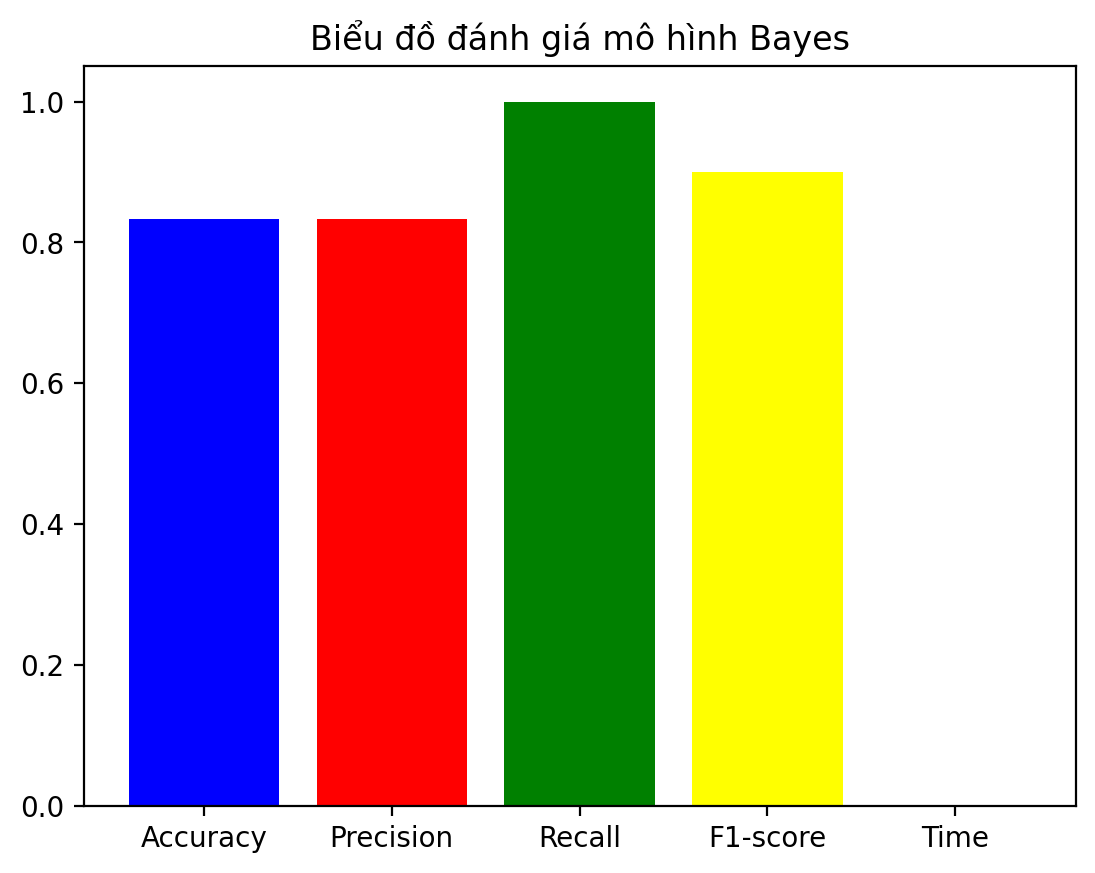

In [ ]:
# Vẽ biểu đồ hiển thị các chỉ số đánh giá của mô hình Bayes
Label = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
Value = [mean_accuracy_gauss, mean_precision_gauss, mean_recall_gauss, mean_f1score_gauss, mean_time_gauss]
plt.figure(dpi = DPI)
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.bar(Label, Value, color=color)
plt.title('Biểu đồ đánh giá mô hình Bayes')
plt.savefig('gauss.svg')
plt.show()

In [ ]:
# Xây dựng mô hình xác suất KNN
from sklearn import neighbors
# Sử dụng mô hình KNN
accuracies_knn = []
precisions_knn = []
recalls_knn    = []
f1_scores_knn  = []
train_times_knn = []
results = []


for i in range(K_FOLD):
  # Chia dữ liệu training và testing
    X_train, X_test = X_train_np[i], X_test_np[i]
    Y_train, Y_test = Y_train_np[i], Y_test_np[i]

    #Khởi tạo mô hình
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=3)

    start = time.time()
    # Huấn luyện mô hình
    model_knn.fit(X_train, Y_train)
    finish = time.time() - start
    print('Thời gian huấn luyện :  ', finish)

    # Dự đoán mô hình
    y_pred_knn = model_knn.predict(X_test)

    # Đưa ra các độ chính xác của mô hình
    accuracy_knn  = accuracy_score(Y_test, y_pred_knn)
    precision_knn = precision_score(Y_test, y_pred_knn)
    recall_knn    = recall_score(Y_test, y_pred_knn)
    f1score_knn   = f1_score(Y_test, y_pred_knn)

    # In ra kết quả
    print("FOLD:", i)
    print("{:15}: {:<5.4}".format('accuracy', accuracy_knn))
    print("{:15}: {:<5.4}".format('precision', precision_knn))
    print("{:15}: {:<5.4}".format('recall', recall_knn))
    print("{:15}: {:<5.4}".format('f1score', f1score_knn))
    print("{:15}: {:<5.4}s".format('time', finish))
    print("######################################")

    # Lưu kết quả vào danh sách
    results.append({
        'Fold': i + 1,
        'Accuracy': accuracy_knn,
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1 Score': f1score_knn,
        'Training Time': finish
    })

    # Append vào các mảng
    accuracies_knn.append(accuracy_knn)
    precisions_knn.append(precision_knn)
    recalls_knn.append(recall_knn)
    f1_scores_knn.append(f1score_knn)
    train_times_knn.append(finish)
    i+=1


# Tính các giá trị trung bình
mean_accuracy_knn = np.mean(accuracies_knn)
std_acc_knn      = np.std(accuracies_knn)

mean_precision_knn = np.mean(precisions_knn)
std_pre_knn      = np.std(precisions_knn)

mean_recall_knn = np.mean(recalls_knn)
std_rec_knn       = np.std(recalls_knn)

mean_f1score_knn = np.mean(f1_scores_knn)
std_f1_knn       = np.std(f1_scores_knn)

mean_time_knn = np.mean(train_times_knn)
std_time_knn  = np.std(train_times_knn)

print("{:15}: {:>5.4} ".format('mean_accuracy', mean_accuracy_knn, std_acc_knn))
print("{:15}: {:>5.4} ".format('mean_precision', mean_precision_knn, std_pre_knn))
print("{:15}: {:>5.4} ".format('mean_recall', mean_recall_knn, std_rec_knn))
print("{:15}: {:>5.4} ".format('mean_f1_score', mean_f1score_knn, std_f1_knn))
print("{:15}: {:>5.4}s ".format('mean_time', mean_time_knn, std_time_knn))

# Lưu kết quả trung bình
results.append({
        'Fold': 'Average',
        'Accuracy': mean_accuracy_knn,
        'Precision': mean_precision_knn,
        'Recall': mean_recall_knn,
        'F1 Score': mean_f1score_knn,
        'Training Time': mean_time_knn
    })

# Tạo DataFrame từ kết quả
results_df = pd.DataFrame(results)
# Định dạng các cột số
results_df['Accuracy'] = results_df['Accuracy'].map('{:.4f}'.format)
results_df['Precision'] = results_df['Precision'].map('{:.4f}'.format)
results_df['Recall'] = results_df['Recall'].map('{:.4f}'.format)
results_df['F1 Score'] = results_df['F1 Score'].map('{:.4f}'.format)
results_df['Training Time'] = results_df['Training Time'].map('{:.4f}s'.format)
results_df.to_csv('knn_results.csv', index=False)

Thời gian huấn luyện :   0.0
FOLD: 0
accuracy       : 0.6667
precision      : 1.0  
recall         : 0.5  
f1score        : 0.6667
time           : 0.0  s
######################################
Thời gian huấn luyện :   0.0010004043579101562
FOLD: 1
accuracy       : 0.6667
precision      : 0.6667
recall         : 1.0  
f1score        : 0.8  
time           : 0.001s
######################################
Thời gian huấn luyện :   0.0
FOLD: 2
accuracy       : 0.6667
precision      : 0.6667
recall         : 1.0  
f1score        : 0.8  
time           : 0.0  s
######################################
Thời gian huấn luyện :   0.0009996891021728516
FOLD: 3
accuracy       : 1.0  
precision      : 1.0  
recall         : 1.0  
f1score        : 1.0  
time           : 0.0009997s
######################################
mean_accuracy  :  0.75 
mean_precision : 0.8333 
mean_recall    : 0.875 
mean_f1_score  : 0.8167 
mean_time      : 0.0005s 


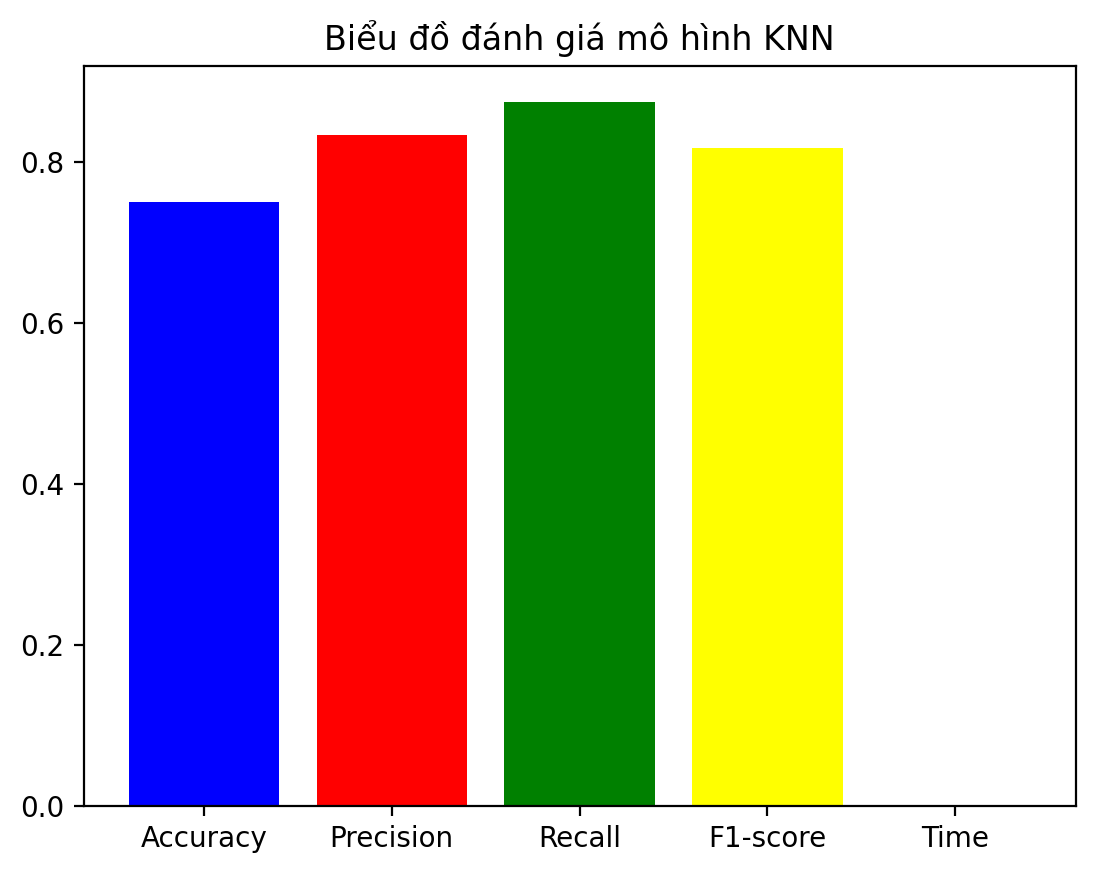

In [ ]:
# Vẽ biểu đồ hiển thị các chỉ số đánh giá của mô hình SVM
Label = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
Value = [mean_accuracy_knn, mean_precision_knn, mean_recall_knn, mean_f1score_knn, mean_time_knn]
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.figure(dpi = DPI)
plt.bar(Label, Value, color=color)
plt.title('Biểu đồ đánh giá mô hình KNN')
plt.savefig('knn.svg')
plt.show()